In [5]:
import pandas as pd
import numpy as np

#### 목표

    - 실제 데이터인 mpg 데이터의 특징을 파악하고 분석해보자
    - mpg (mile per gallon) 는 미국 환경 보호국에서 공개한 데이터
    - 1999년 ~ 2008년 234종

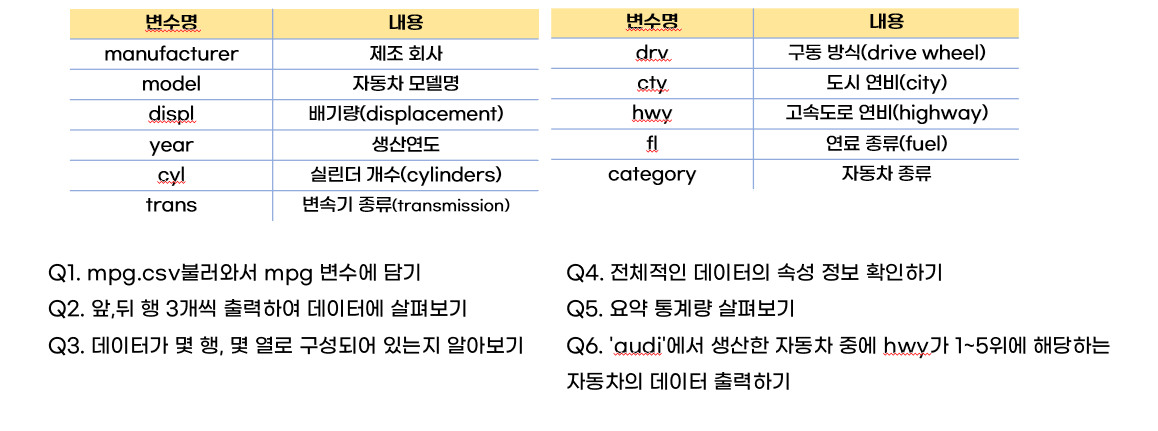


In [6]:
# Q1. mpg.csv 불러와서 mpg 변수에 담기
mpg = pd.read_csv("../data/csv/mpg.csv", encoding="utf-8")

# Q2. 앞, 뒤 행 3개씩 출력하여 데이터 살펴보기
display(mpg.head(3))
display(mpg.tail(3))

# Q3. 데이터가 몇 행, 몇 열로 구성되어 있는지 확인하기
display(mpg.shape)

# Q4. 전체적인 데이터의 속성 정보 확인하기
display(mpg.info())

# Q5. 요약 통계량 살펴보기
display(mpg.describe())

# Q6. 'audi' 에서 생산한 자동차 중에 hwy 가 1~5 위에 해당하는 자동차의 데이터 출력하기
audi_hwy_desc_boolean = mpg[mpg['manufacturer'] == 'audi'].sort_values(by='hwy', ascending=False).head()
audi_hwy_desc_query = mpg.query("manufacturer == 'audi'").sort_values(by="hwy", ascending=False).head()
display(audi_hwy_desc_boolean)
display(audi_hwy_desc_query)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize
233,volkswagen,passat,3.6,2008,6,auto(s6),f,17,26,p,midsize


(234, 11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  category      234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


None

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact


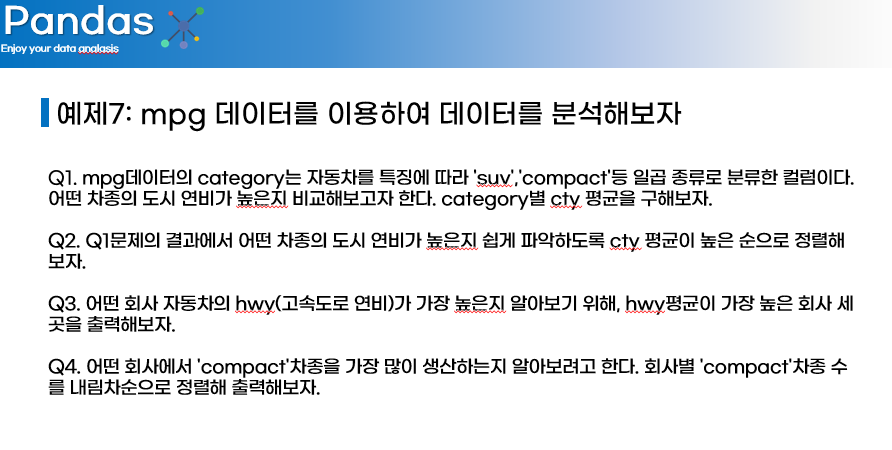

In [73]:
# Q1
mpg_cty = mpg[['category','cty']].groupby(['category']).mean()
display(mpg_cty)
mpg_cty2 = mpg.groupby('category').agg(nclass_mean_math = ('cty', 'mean'))
display(mpg_cty2)
# Q2
display(mpg_cty.sort_values(by = 'cty', ascending=False))
display(mpg_cty2.sort_values(by = 'nclass_mean_math', ascending=False))
# Q3
mpg_manufacturer = mpg[['manufacturer','hwy']].groupby(['manufacturer']).mean().sort_values(by='hwy', ascending=False).head(3)
display(mpg_manufacturer)
mpg_manufacturer2 = mpg.groupby('manufacturer').agg(mpg_manufacturer2 = ('hwy', 'mean')).sort_values(by='mpg_manufacturer2', ascending=False).head(3)
display(mpg_manufacturer2)
# Q4
# boolean 
result_boolean = mpg[mpg['category'] == 'compact'].groupby(['manufacturer']).agg(grade_cnt = ('category', 'count')).sort_values('grade_cnt', ascending=False)
display(result_boolean)
# query
result_query = mpg.query('category == "compact"').groupby(['manufacturer']).agg(grade_cnt = ('category', 'count')).sort_values('grade_cnt', ascending=False)
display(result_query)
# etc
result_query = mpg.query('category == "compact"')['manufacturer'].value_counts()
result_query = mpg.query('category == "compact"').value_counts('manufacturer')
display(result_query)

,cty
category,
2seater,15.400000
compact,20.127660
midsize,18.756098
minivan,15.818182
pickup,13.000000
subcompact,20.371429
suv,13.500000


,nclass_mean_math
category,
2seater,15.400000
compact,20.127660
midsize,18.756098
minivan,15.818182
pickup,13.000000
subcompact,20.371429
suv,13.500000


,cty
category,
subcompact,20.371429
compact,20.127660
midsize,18.756098
minivan,15.818182
2seater,15.400000
suv,13.500000
pickup,13.000000


,nclass_mean_math
category,
subcompact,20.371429
compact,20.127660
midsize,18.756098
minivan,15.818182
2seater,15.400000
suv,13.500000
pickup,13.000000


,hwy
manufacturer,
honda,32.555556
volkswagen,29.222222
hyundai,26.857143


,mpg_manufacturer2
manufacturer,
honda,32.555556
volkswagen,29.222222
hyundai,26.857143


,grade_cnt
manufacturer,
audi,15
volkswagen,14
toyota,12
subaru,4
nissan,2


,grade_cnt
manufacturer,
audi,15
volkswagen,14
toyota,12
subaru,4
nissan,2


manufacturer
audi          15
volkswagen    14
toyota        12
subaru         4
nissan         2
Name: count, dtype: int64